In [2]:
import torch
import torchvision
from torchvision import transforms, datasets

Well be using the MNIST dataset to learn data processing with PyTorch. Torchvision comes prepackaged with datasets. These datasets are pre-pruned for deep learning, their data has been converted to numerical values and there are batches*.

With deep learning in general you'll have a training and test dataset, its important to seperate these as early as possible.

In order to validate a model we need out of sample test data which is the most realistic test as the model has never seen the data before, as opposed to in sample data that the model was trained on. We can actually test for overfitting by seeing if the model does well on sample data and not well on out of sample data.

The MINST dataset, even though it comes from Torchvision is not in Tensor form, transforms allows us to transform the data using built in or custom transform methods.

In [7]:
train = datasets.MNIST("", train=True, download=True,
                  transform = transforms.Compose([transforms.ToTensor()]))

In [8]:
test = datasets.MNIST("", train=False, download=True,
                  transform = transforms.Compose([transforms.ToTensor()]))

Once we have our data in a variable, we can then put it into another object in order to iterate over it.
We use the DataLoader to load in data for the model to a variable, specifying batch_size and shuffle.

Batch Size is a key topic, a batch size will usually be between 8 and 64 regardless of how big the dataset is. The reasons we use batch sizes is to not only not pass the entire data set through the model at once but also that when we pass our dataset through the model in chunks/batches more generalization occurs and a lot of overfitting dissapears becuase for example when passing lots of mini data sets the model would be better trained. Each datasets batchsize has a sweetspot for a model.

Shuffling is extremely important, for example the MNIST digits are in order and the neural network will take shortcuts/tricks to reduce loss (the model has no a priori knowledge of what the lowest loss could be, so as the optimizer is trying to decrease our loss it has no idea of how good of an optimization we could get so it keeps on optimizing by decreasing loss as best/easy as possible), so we shuffle and are always thinking about how to obfuscate overfitting.

In [9]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [12]:
for data in trainset:
    print(data)             # data is a single batch, 10 examples of hand written digits, with 10 tensors representing the actual output
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [24]:
# python: the temp variable from a for loop can be accessed, here 'data'
# data contains a list of images and a list of tensors, x is our image data for corresponsing output tensor y
x,y = data[0][0], data[1][0]

In [25]:
y

tensor(3)

In [26]:
# Note:  that pre-loaded datasets are in a strange shape, a normal image would just be 28,28. 
print(data[0][0].shape)

torch.Size([1, 28, 28])


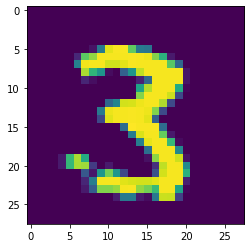

In [27]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28))  # show image as a 28,28
plt.show()

We want to make sure that our dataset is  not overweighted, for example if 60% of MNIST were 3's then the model would always output a 3 and wouldnt know how to predict for other digits. Thats why when creating and exploring a dataset its good to get an idea of how weighted each input is of the total.

In [32]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1   # at y key, value += 1
        total +=1
        
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [33]:
for i in counter_dict:
    print(f"{i}: {(counter_dict[i]/total) * 100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001
